In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [2]:
data = pd.read_csv("ag.csv", header=1, parse_dates=["Price Date"], index_col="Price Date")
data.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal)
Price Date,,,,,,,,,
2020-12-30,1,Agra,Achnera,Potato,Desi,FAQ,900,1000,950
2020-12-29,2,Agra,Achnera,Potato,Desi,FAQ,800,900,850
2020-12-28,3,Agra,Achnera,Potato,Desi,FAQ,850,950,900
2020-12-27,4,Agra,Achnera,Potato,Desi,FAQ,800,900,850
2020-12-26,5,Agra,Achnera,Potato,Desi,FAQ,800,900,850


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1827 entries, 2020-12-30 to 2020-01-01
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Sl no.                     1827 non-null   int64 
 1   District Name              1827 non-null   object
 2   Market Name                1827 non-null   object
 3   Commodity                  1827 non-null   object
 4   Variety                    1827 non-null   object
 5   Grade                      1827 non-null   object
 6   Min Price (Rs./Quintal)    1827 non-null   int64 
 7   Max Price (Rs./Quintal)    1827 non-null   int64 
 8   Modal Price (Rs./Quintal)  1827 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 142.7+ KB


In [4]:
data_agra = data[data["Market Name"] == "Agra"]
data_agra

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal)
Price Date,,,,,,,,,
2020-12-31,307,Agra,Agra,Potato,Desi,FAQ,800,1100,960
2020-12-30,308,Agra,Agra,Potato,Desi,FAQ,800,1050,940
2020-12-29,309,Agra,Agra,Potato,Desi,FAQ,800,1080,950
2020-12-28,310,Agra,Agra,Potato,Desi,FAQ,800,1100,950
2020-12-26,311,Agra,Agra,Potato,Desi,FAQ,850,1100,980
...,...,...,...,...,...,...,...,...,...
2020-01-07,587,Agra,Agra,Potato,Desi,FAQ,1200,1400,1300
2020-01-06,588,Agra,Agra,Potato,Desi,FAQ,1200,1350,1280
2020-01-04,589,Agra,Agra,Potato,Desi,FAQ,1240,1400,1310


In [5]:
data1 = data_agra.drop(["Modal Price (Rs./Quintal)", "Min Price (Rs./Quintal)", "Grade", "Variety", "Commodity", "Market Name", "District Name", "Sl no."], axis=1)

In [6]:
data1.head()

,Max Price (Rs./Quintal)
Price Date,
2020-12-31,1100
2020-12-30,1050
2020-12-29,1080
2020-12-28,1100
2020-12-26,1100


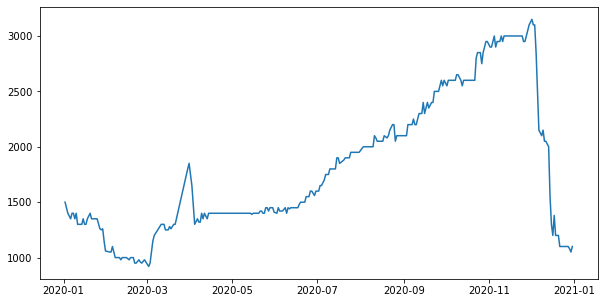

In [7]:
plt.figure(figsize=(10,5))
plt.plot(data1)

## Smoothing Method

These Methods are use for make dataset stationary by substracting the roling mean from original dataset

#### Moving Avg

In [19]:
data1.head()

,Max Price (Rs./Quintal)
Price Date,
2020-12-31,1100
2020-12-30,1050
2020-12-29,1080
2020-12-28,1100
2020-12-26,1100


In [22]:
# Rolling mean is also known as Moving Avg
# window=5 is used to when we take consider last five vales
rolling_series = data1.rolling(window=5)
rolling_mean = rolling_series.mean()

In [23]:
print(rolling_mean)

            Max Price (Rs./Quintal)  rolling_mean
Price Date                                       
2020-12-31                      NaN           NaN
2020-12-30                      NaN           NaN
2020-12-29                      NaN           NaN
2020-12-28                      NaN           NaN
2020-12-26                   1086.0           NaN
...                             ...           ...
2020-01-07                   1370.0        1338.0
2020-01-06                   1380.0        1352.0
2020-01-04                   1380.0        1362.0
2020-01-03                   1400.0        1376.0
2020-01-02                   1420.0        1390.0

[285 rows x 2 columns]


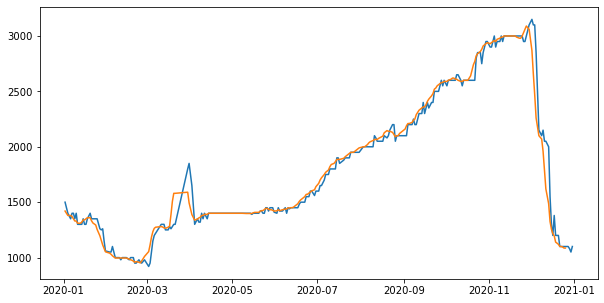

In [10]:
plt.figure(figsize=(10,5))
plt.plot(data1, label="original")
plt.plot(rolling_mean, label="MA")
plt.show()

#### Simple Exponential Smoothing

In [11]:
# smoothing_level it's a value of alpha it tells that how much you give more waitage to recent data

fit1 = SimpleExpSmoothing(data1).fit(smoothing_level=0.2, optimized=False)
fit2 = SimpleExpSmoothing(data1).fit(smoothing_level=0.8, optimized=False)


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has

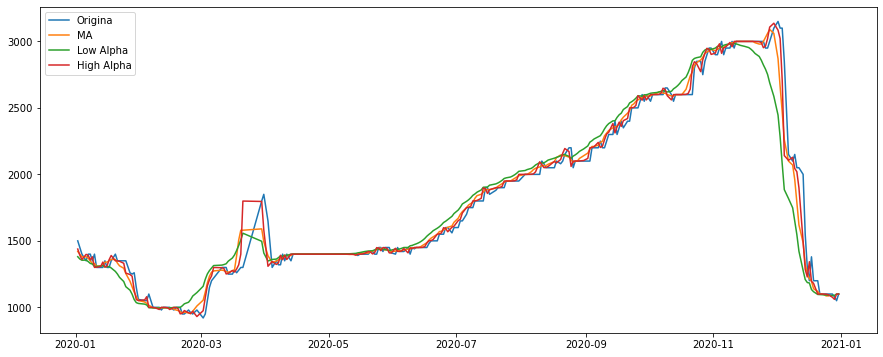

In [12]:
plt.figure(figsize=(15,6))
plt.plot(data1, label="Origina")
plt.plot(rolling_mean, label="MA")

plt.plot(fit1.fittedvalues, label="Low Alpha")
plt.plot(fit2.fittedvalues, label="High Alpha")

plt.legend()
plt.show()

#### Holt Method

In [13]:
holt1 = Holt(data1).fit() # we are assuming it follows linear Trend
holt2 = Holt(data1, exponential= True).fit() # we are assuming it follows Exponential Trend

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignor

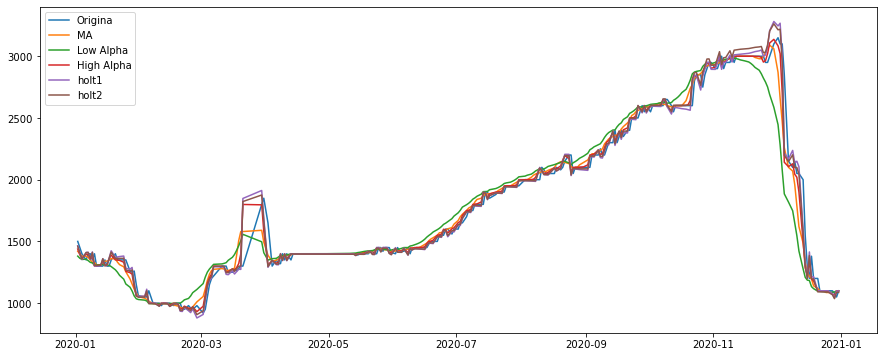

In [14]:
plt.figure(figsize=(15,6))
plt.plot(data1, label="Origina")
plt.plot(rolling_mean, label="MA")

plt.plot(fit1.fittedvalues, label="Low Alpha")
plt.plot(fit2.fittedvalues, label="High Alpha")

plt.plot(holt1.fittedvalues, label="holt1")
plt.plot(holt2.fittedvalues, label="holt2")

plt.legend()
plt.show()

## DeComposition

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [16]:
#multiplicative Decompse
mul_result = seasonal_decompose(data1["Max Price (Rs./Quintal)"], model='multiplicative', period=1)

#additive Decompse
add_result = seasonal_decompose(data1["Max Price (Rs./Quintal)"], model='additive', period=1)

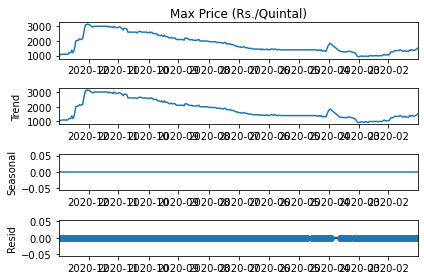

In [17]:
add_result.plot();

# we give here ; because otherwise it will plot the graph twice

In [18]:
add_result.seasonal

Price Date
2020-12-31    0.0
2020-12-30    0.0
2020-12-29    0.0
2020-12-28    0.0
2020-12-26    0.0
             ... 
2020-01-07    0.0
2020-01-06    0.0
2020-01-04    0.0
2020-01-03    0.0
2020-01-02    0.0
Name: seasonal, Length: 285, dtype: float64